In [43]:
import json
import re
from collections import OrderedDict
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
from nltk.corpus import stopwords

In [57]:
overlaps_lemma = []


from nltk.stem import LancasterStemmer
tokenize = WhitespaceTokenizer().tokenize


stop_words = set(stopwords.words('english'))


def overlap(a, b):
    # remove stopwords
    a = set(a) - stop_words
    b = set(b) - stop_words
    # TODO: fraction?
    return len(a & b)

def stem(seq):
    stemmer = LancasterStemmer()
    stemmed = [stemmer.stem(re.sub('[?!,.\(\)\:\;]', '', word)) for word in seq]
    print("Stemmed:", stemmed)
    return stemmed


def find_in_spans(idx, spans):
    for i, span in enumerate(spans):
        if idx >= span[0] and idx <= span[1]:
            return i


def hood(context, idx):
#     s = re.sub('[?!,.\(\)\:\;]', '', context)  <-- would move index
    s = context
    span_generator = WhitespaceTokenizer().span_tokenize(s)
    spans = [span for span in span_generator]
    tokens = WhitespaceTokenizer().tokenize(s)
    assert s[spans[0][0]:spans[0][1]] == tokens[0]
    assert s[spans[-1][0]:spans[-1][1]] == tokens[-1]
#     print(s[spans[0][0]:spans[0][1]], tokens[0])
#     print(s[spans[-1][0]:spans[-1][1]], tokens[-1])
    
#     print(context[idx:idx+10])
    
    idx = find_in_spans(idx, spans)
    
    start = max(0, idx - 10)
    end = min(idx + 10, len(tokens))
    tokens = tokens[idx - 10: idx + 10]
    print("Result +-10:", tokens)
    print(len(' '.join(tokens)))
    return tokens


with open("dev-v1.1.json") as fp:
    train = json.load(fp)

for ii, i in enumerate(train['data']):
    for jj, j in enumerate(i['paragraphs']):
        # one context
        context = j['context']
        for kk, k in enumerate(j['qas']):
            # one question
            question = k['question']
            if not k['answers']: continue
            print("True answer:", k['answers'][0]['text'])
            answer = hood(context, k['answers'][0]['answer_start'])
            if not answer: continue
#             print(answer)
            o = overlap(stem(tokenize(question)), stem(answer))
            overlaps_lemma.append((o, question, answer, (ii, jj, kk), k['id']))
            k['overlap'] = o
            print()
        

True answer: Denver Broncos
Result +-10: ['for', 'the', '2015', 'season.', 'The', 'American', 'Football', 'Conference', '(AFC)', 'champion', 'Denver', 'Broncos', 'defeated', 'the', 'National', 'Football', 'Conference', '(NFC)', 'champion', 'Carolina']
149
Stemmed: ['which', 'nfl', 'team', 'repres', 'the', 'afc', 'at', 'sup', 'bowl', '50']
Stemmed: ['for', 'the', '2015', 'season', 'the', 'am', 'footbal', 'conf', 'afc', 'champ', 'denv', 'bronco', 'def', 'the', 'nat', 'footbal', 'conf', 'nfc', 'champ', 'carolin']

True answer: Carolina Panthers
Result +-10: ['champion', 'Denver', 'Broncos', 'defeated', 'the', 'National', 'Football', 'Conference', '(NFC)', 'champion', 'Carolina', 'Panthers', '24–10', 'to', 'earn', 'their', 'third', 'Super', 'Bowl', 'title.']
142
Stemmed: ['which', 'nfl', 'team', 'repres', 'the', 'nfc', 'at', 'sup', 'bowl', '50']
Stemmed: ['champ', 'denv', 'bronco', 'def', 'the', 'nat', 'footbal', 'conf', 'nfc', 'champ', 'carolin', 'panth', '24–10', 'to', 'earn', 'their', '

Stemmed: ['the', 'san', 'francisco', 'bay', 'are', 'sint', 'sup', 'bowl', 'xix', 'in', '1985', 'and', 'the', 'first', 'in', 'californ', 'sint', 'sup', 'bowl', 'xxxvii']

True answer: Super Bowl XXXVII
Result +-10: ['Bowl', 'XIX', 'in', '1985,', 'and', 'the', 'first', 'in', 'California', 'since', 'Super', 'Bowl', 'XXXVII', 'took', 'place', 'in', 'San', 'Diego', 'in', '2003.']
102
Stemmed: ['which', 'sup', 'bowl', 'was', 'host', 'in', 'san', 'diego', 'in', '2003']
Stemmed: ['bowl', 'xix', 'in', '1985', 'and', 'the', 'first', 'in', 'californ', 'sint', 'sup', 'bowl', 'xxxvii', 'took', 'plac', 'in', 'san', 'diego', 'in', '2003']

True answer: May 21, 2013
Result +-10: []
0
True answer: 2014
Result +-10: ['game', 'to', "Levi's", 'Stadium.', 'The', '$1.2', 'billion', 'stadium', 'opened', 'in', '2014.', 'It', 'is', 'the', 'first', 'Super', 'Bowl', 'held', 'in', 'the']
103
Stemmed: ['when', 'did', "levi's", 'stad', 'op']
Stemmed: ['gam', 'to', "levi's", 'stad', 'the', '$12', 'bil', 'stad', 'op'

Stemmed: ['how', 'many', 'turnov', 'did', 'the', 'panth', 'forc', 'dur', 'the', 'nfc', 'champ', 'gam']
Stemmed: ['nfc', 'champ', 'gam', '49–15', 'rack', 'up', '487', 'yard', 'and', 'forc', 'sev', 'turnov']

True answer: Seattle Seahawks
Result +-10: []
0
True answer: 49–15
Result +-10: ['blew', 'out', 'the', 'Arizona', 'Cardinals', 'in', 'the', 'NFC', 'Championship', 'Game,', '49–15,', 'racking', 'up', '487', 'yards', 'and', 'forcing', 'seven', 'turnovers.']
117
Stemmed: ['what', 'was', 'the', 'scor', 'for', 'the', '2015', 'nfc', 'champ', 'gam']
Stemmed: ['blew', 'out', 'the', 'arizon', 'cardin', 'in', 'the', 'nfc', 'champ', 'gam', '49–15', 'rack', 'up', '487', 'yard', 'and', 'forc', 'sev', 'turnov']

True answer: Arizona Cardinals
Result +-10: ['from', 'a', 'year', 'earlier.', 'The', 'Panthers', 'then', 'blew', 'out', 'the', 'Arizona', 'Cardinals', 'in', 'the', 'NFC', 'Championship', 'Game,', '49–15,', 'racking', 'up']
117
Stemmed: ['who', 'did', 'the', 'panth', 'play', 'in', 'their',

True answer: A professional fundraiser
Result +-10: ['Bellomy', 'Field', 'at', 'Santa', 'Clara', 'University,', 'and', 'a', 'pep', 'rally.', 'A', 'professional', 'fundraiser', 'will', 'aid', 'in', 'finding', 'business', 'sponsors', 'and']
125
Stemmed: ['who', 'help', 'find', 'spons', 'and', 'don', 'to', 'help', 'with', 'the', 'cost']
Stemmed: ['bellom', 'field', 'at', 'sant', 'clar', 'univers', 'and', 'a', 'pep', 'ral', 'a', 'profess', 'fundra', 'wil', 'aid', 'in', 'find', 'busy', 'spons', 'and']

True answer: city council
Result +-10: ['business', 'sponsors', 'and', 'individual', 'donors,', 'but', 'still', 'may', 'need', 'the', 'city', 'council', 'to', 'help', 'fund', 'the', 'event.', 'Additional', 'funding', 'will']
124
Stemmed: ['who', 'set', 'asid', 'see', 'fund', 'for', 'the', 'week-long', 'ev', 'lead', 'up', 'to', 'the', 'sup', 'bowl']
Stemmed: ['busy', 'spons', 'and', 'individ', 'don', 'but', 'stil', 'may', 'nee', 'the', 'city', 'council', 'to', 'help', 'fund', 'the', 'ev', 'add

Stemmed: ['and', 'ed', 'mccaffrey', 'on', 'col', 'com', 'in', 'nor', 'carolin', 'wbt', '1110', 'am', 'wil', 'carry', 'the', 'gam', 'with', 'mick', 'mixon', 'on']

True answer: Chester, South Carolina
Result +-10: ['its', 'sister', 'station', 'WBT-FM', '(99.3', 'FM),', 'which', 'is', 'based', 'in', 'Chester,', 'South', 'Carolina.', 'As', 'KOA', 'and', 'WBT', 'are', 'both', 'clear-channel']
117
Stemmed: ['in', 'what', 'city', 'is', 'wbt-fm', 'loc']
Stemmed: ['it', 'sist', 'stat', 'wbt-fm', '993', 'fm', 'which', 'is', 'bas', 'in', 'chest', 'sou', 'carolin', 'as', 'koa', 'and', 'wbt', 'ar', 'both', 'clear-channel']

True answer: Mick Mixon
Result +-10: ['North', 'Carolina,', 'WBT', '(1110', 'AM)', 'will', 'carry', 'the', 'game,', 'with', 'Mick', 'Mixon', 'on', 'play-by-play', 'and', 'Eugene', 'Robinson', 'and', 'Jim', 'Szoke']
116
Stemmed: ['who', 'did', 'play-by-play', 'for', 'the', 'wbt', 'broadcast']
Stemmed: ['nor', 'carolin', 'wbt', '1110', 'am', 'wil', 'carry', 'the', 'gam', 'with', 

True answer: Anderson
Result +-10: ['was', 'his', 'top', 'receiver', 'with', 'six', 'receptions', 'for', '83', 'yards.', 'Anderson', 'was', 'the', "game's", 'leading', 'rusher', 'with', '90', 'yards', 'and']
111
Stemmed: ['who', 'was', 'the', "game's", 'lead', 'rush']
Stemmed: ['was', 'his', 'top', 'receiv', 'with', 'six', 'receiv', 'for', '83', 'yard', 'anderson', 'was', 'the', "game's", 'lead', 'rush', 'with', '90', 'yard', 'and']

True answer: Sanders
Result +-10: ['23', 'for', '141', 'yards', 'with', 'one', 'interception', 'and', 'zero', 'touchdowns.', 'Sanders', 'was', 'his', 'top', 'receiver', 'with', 'six', 'receptions', 'for', '83']
115
Stemmed: ['who', 'was', 'the', "game's", 'top', 'receiv']
Stemmed: ['23', 'for', '141', 'yard', 'with', 'on', 'interceiv', 'and', 'zero', 'touchdown', 'sand', 'was', 'his', 'top', 'receiv', 'with', 'six', 'receiv', 'for', '83']

True answer: Thomas Davis
Result +-10: ['forced', 'fumble.', 'Linebacker', 'Luke', 'Kuechly', 'had', '11', 'total', 't

True answer: September 1939
Result +-10: []
0
True answer: a German Nazi colonial administration
Result +-10: ['including', 'Warsaw,', 'came', 'under', 'the', 'rule', 'of', 'the', 'General', 'Government,', 'a', 'German', 'Nazi', 'colonial', 'administration.', 'All', 'higher', 'education', 'institutions', 'were']
142
Stemmed: ['who', 'was', 'warsaw', 'und', 'the', 'admin', 'of', 'when', 'it', 'cam', 'und', 'the', 'rul', 'of', 'the', 'gen', 'gov']
Stemmed: ['includ', 'warsaw', 'cam', 'und', 'the', 'rul', 'of', 'the', 'gen', 'govern', 'a', 'germ', 'naz', 'colon', 'admin', 'al', 'high', 'educ', 'institut', 'wer']

True answer: some 30% of the city
Result +-10: ['closed', 'and', "Warsaw's", 'entire', 'Jewish', 'population', '–', 'several', 'hundred', 'thousand,', 'some', '30%', 'of', 'the', 'city', '–', 'herded', 'into', 'the', 'Warsaw']
118
Stemmed: ['how', 'much', 'of', "warsaw's", 'pop', 'was', 'jew']
Stemmed: ['clos', 'and', "warsaw's", 'entir', 'jew', 'pop', '–', 'sev', 'hundr', 'thous

Result +-10: ['the', 'service', 'of', 'Byzantium.', 'The', "city's", 'garrison', 'resisted', 'until', 'February', '1082,', 'when', 'Dyrrachium', 'was', 'betrayed', 'to', 'the', 'Normans', 'by', 'the']
126
Stemmed: ['when', 'did', 'dyrrach', 'fal', 'to', 'the', 'norm']
Stemmed: ['the', 'serv', 'of', 'byzant', 'the', "city's", 'garrison', 'resist', 'until', 'febru', '1082', 'when', 'dyrrach', 'was', 'betray', 'to', 'the', 'norm', 'by', 'the']

True answer: 30,000
Result +-10: ['cities', 'of', 'Dalmatia,', 'in', '1081', 'he', 'led', 'an', 'army', 'of', '30,000', 'men', 'in', '300', 'ships', 'landing', 'on', 'the', 'southern', 'shores']
100
Stemmed: ['how', 'many', 'men', 'wer', 'in', "robert's", 'army']
Stemmed: ['city', 'of', 'dalmat', 'in', '1081', 'he', 'led', 'an', 'army', 'of', '30000', 'men', 'in', '300', 'ship', 'land', 'on', 'the', 'southern', 'shor']

True answer: Deabolis
Result +-10: ['the', 'citadel', 'of', 'Mili', 'at', 'the', 'banks', 'of', 'the', 'river', 'Deabolis,', 'Glla

Result +-10: ['went', 'to', 'Maribor', '(now', 'in', 'Slovenia),', 'where', 'he', 'worked', 'as', 'a', 'draftsman', 'for', '60', 'florins', 'a', 'month.', 'He', 'spent', 'his']
102
Stemmed: ['what', 'did', 'tesl', 'work', 'as', 'aft', 'drop', 'out']
Stemmed: ['went', 'to', 'marib', 'now', 'in', 'sloven', 'wher', 'he', 'work', 'as', 'a', 'draftsm', 'for', '60', 'florin', 'a', 'mon', 'he', 'spent', 'his']

True answer: return home
Result +-10: ['Milutin', 'Tesla', 'went', 'to', 'Maribor', 'to', 'beg', 'his', 'son', 'to', 'return', 'home,', 'but', 'Nikola', 'refused.', 'Nikola', 'suffered', 'a', 'nervous', 'breakdown']
116
Stemmed: ['bef', 'he', 'died', 'what', 'did', "tesla's", 'fath', 'ask', 'him', 'to', 'do']
Stemmed: ['milutin', 'tesl', 'went', 'to', 'marib', 'to', 'beg', 'his', 'son', 'to', 'return', 'hom', 'but', 'nikol', 'refus', 'nikol', 'suff', 'a', 'nerv', 'breakdown']

True answer: nervous breakdown
Result +-10: ['son', 'to', 'return', 'home,', 'but', 'Nikola', 'refused.', 'Nik

Stemmed: ['what', 'did', 'tesl', 'think', 'nit', 'acid', 'contribut', 'to']
Stemmed: ['on', 'the', 'ear', 'investig', 'of', 'thi', 'phenomenon', 'he', 'attribut', 'the', 'skin', 'dam', 'to', 'vary', 'caus', 'he', 'believ', 'ear', 'on', 'that']

True answer: his circuit and single-node X-ray-producing devices
Result +-10: []
0
True answer: force-free magnetic fields
Result +-10: ['in', 'waves', 'in', 'plasmas.', 'These', 'plasma', 'waves', 'can', 'occur', 'in', 'force-free', 'magnetic', 'fields.']
80
Stemmed: ['wher', 'do', 'plasm', 'wav', 'occ']
Stemmed: ['in', 'wav', 'in', 'plasma', 'thes', 'plasm', 'wav', 'can', 'occ', 'in', 'force-fr', 'magnet', 'field']

True answer: ozone generated in contact with the skin
Result +-10: ['was', 'not', 'caused', 'by', 'the', 'Roentgen', 'rays,', 'but', 'by', 'the', 'ozone', 'generated', 'in', 'contact', 'with', 'the', 'skin,', 'and', 'to', 'a']
98
Stemmed: ['at', 'first', 'what', 'did', 'tesl', 'think', 'was', 'the', 'main', 'caus', 'of', 'dam', 'to

Stemmed: ['tesl', 'walk', 'to', 'the', 'park', 'every', 'day', 'to', 'fee', 'the', 'pigeon', 'and', 'ev', 'brought', 'ind', 'on', 'into', 'his', 'hotel', 'room']

True answer: over $2,000
Result +-10: ['visited', 'by', 'a', 'specific', 'injured', 'white', 'pigeon', 'daily.', 'Tesla', 'spent', 'over', '$2,000,', 'including', 'building', 'a', 'device', 'that', 'comfortably', 'supported', 'her']
133
Stemmed: ['how', 'much', 'did', 'tesl', 'spend', 'on', 'the', 'ind', 'pigeon']
Stemmed: ['visit', 'by', 'a', 'spec', 'ind', 'whit', 'pigeon', 'dai', 'tesl', 'spent', 'ov', '$2000', 'includ', 'build', 'a', 'dev', 'that', 'comfort', 'support', 'her']

True answer: broken wing and leg
Result +-10: ['supported', 'her', 'so', 'her', 'bones', 'could', 'heal,', 'to', 'fix', 'her', 'broken', 'wing', 'and', 'leg.', 'Tesla', 'stated,']
84
Stemmed: ['what', 'was', 'wrong', 'with', 'the', 'pigeon']
Stemmed: ['support', 'her', 'so', 'her', 'bon', 'could', 'heal', 'to', 'fix', 'her', 'brok', 'wing', 'and', 

Stemmed: ['class', 'of', 'resourc', 'is', 'cont', 'on', 'determin', 'the', 'up', 'and', 'low', 'bound', 'of', 'minim', 'tim', 'requir', 'by', 'what']
Stemmed: ['low', 'bound', 'on', 'the', 'minim', 'amount', 'of', 'tim', 'requir', 'by', 'the', 'most', 'efficy', 'algorithm', 'solv', 'a', 'giv', 'problem', 'the', 'complex']

True answer: analysis of algorithms
Result +-10: ['otherwise.', 'Analyzing', 'a', 'particular', 'algorithm', 'falls', 'under', 'the', 'field', 'of', 'analysis', 'of', 'algorithms.', 'To', 'show', 'an', 'upper', 'bound', 'T(n)', 'on']
123
Stemmed: ['the', 'analys', 'of', 'a', 'spec', 'algorithm', 'is', 'typ', 'assign', 'to', 'what', 'field', 'of', 'comput', 'sci']
Stemmed: ['otherw', 'analys', 'a', 'particul', 'algorithm', 'fal', 'und', 'the', 'field', 'of', 'analys', 'of', 'algorithm', 'to', 'show', 'an', 'up', 'bound', 'tn', 'on']

True answer: lower bounds
Result +-10: ['as', 'space', 'consumption),', 'one', 'is', 'interested', 'in', 'proving', 'upper', 'and', 'low

Stemmed: ['wher', 'is', 'anoth', 'indo', 'loc', 'for', 'a', 'teach', 'oth', 'than', 'a', 'school']
Stemmed: ['educ', 'teach', 'facilit', 'stud', 'learn', 'oft', 'in', 'a', 'school', 'or', 'academy', 'or', 'perhap', 'in', 'anoth', 'environ', 'such', 'as', 'outdo', 'a']

True answer: facilitate student learning
Result +-10: []
0
True answer: informal
Result +-10: []
0
True answer: pedagogy
Result +-10: ['skills.', 'Different', 'ways', 'to', 'teach', 'are', 'often', 'referred', 'to', 'as', 'pedagogy.', 'When', 'deciding', 'what', 'teaching', 'method', 'to', 'use', 'teachers', 'consider']
126
Stemmed: ['what', 'is', 'a', 'nam', 'for', 'the', 'diff', 'way', 'to', 'instruct', 'stud']
Stemmed: ['skil', 'diff', 'way', 'to', 'teach', 'ar', 'oft', 'refer', 'to', 'as', 'pedagog', 'when', 'decid', 'what', 'teach', 'method', 'to', 'us', 'teach', 'consid']

True answer: field trips
Result +-10: ['in', 'learning', 'outside', 'of', 'the', 'classroom', 'by', 'accompanying', 'students', 'on', 'field', '

Stemmed: ['what', 'ar', 'upper-level', 'second', 'schools', 'cal']
Stemmed: ['middl', 'level', 'second', 'schools', 'realsch', 'and', 'high', 'level', 'second', 'schools', 'gymnas', 'sal', 'for', 'teach', 'depend', 'on', 'the', 'civil', "servants'", 'sal']

True answer: Extra pay
Result +-10: ['of', 'principal,', 'deputy', 'principal', 'or', 'assistant', 'principal),', 'experience', 'and', 'qualifications.', 'Extra', 'pay', 'is', 'also', 'given', 'for', 'teaching', 'through', 'the', 'Irish']
141
Stemmed: ['what', 'doe', 'teach', 'on', 'an', 'island', 'result', 'in']
Stemmed: ['of', 'princip', 'deputy', 'princip', 'or', 'assist', 'princip', 'expery', 'and', 'qual', 'extr', 'pay', 'is', 'also', 'giv', 'for', 'teach', 'through', 'the', 'ir']

True answer: 27,814
Result +-10: ['an', 'island.', 'The', 'basic', 'pay', 'for', 'a', 'starting', 'teacher', 'is', '€27,814', 'p.a.,', 'rising', 'incrementally', 'to', '€53,423', 'for', 'a', 'teacher', 'with']
115
Stemmed: ['what', 'is', 'the', 'bas'


True answer: early part
Result +-10: ['commentary', 'on', 'Galatians', 'and', 'his', 'Work', 'on', 'the', 'Psalms.', 'This', 'early', 'part', 'of', "Luther's", 'career', 'was', 'one', 'of', 'his', 'most']
106
Stemmed: ['what', 'part', 'of', "luther's", 'car', 'was', 'on', 'of', 'his', 'most', 'produc']
Stemmed: ['com', 'on', 'gal', 'and', 'his', 'work', 'on', 'the', 'psalm', 'thi', 'ear', 'part', 'of', "luther's", 'car', 'was', 'on', 'of', 'his', 'most']

True answer: 1520
Result +-10: ['and', 'productive.', 'Three', 'of', 'his', 'best-known', 'works', 'were', 'published', 'in', '1520:', 'To', 'the', 'Christian', 'Nobility', 'of', 'the', 'German', 'Nation,', 'On']
120
Stemmed: ['when', 'wer', 'som', 'of', "luther's", 'best-known', 'work', 'publ']
Stemmed: ['and', 'produc', 'three', 'of', 'his', 'best-known', 'work', 'wer', 'publ', 'in', '1520', 'to', 'the', 'christian', 'nobl', 'of', 'the', 'germ', 'nat', 'on']

True answer: On the Freedom of a Christian
Result +-10: ['German', 'Natio

Stemmed: ['his', 'colleagu', 'introduc', 'the', 'new', 'ord', 'of', 'wor', 'dur', 'their', 'visit', 'of', 'the', 'elect', 'of', 'saxony', 'which', 'beg', 'in', '1527']

True answer: Christian education
Result +-10: ['1527.', 'They', 'also', 'assessed', 'the', 'standard', 'of', 'pastoral', 'care', 'and', 'Christian', 'education', 'in', 'the', 'territory.', '"Merciful', 'God,', 'what', 'misery', 'I']
125
Stemmed: ['what', 'typ', 'of', 'educ', 'was', 'assess', 'dur', 'thi', 'tim']
Stemmed: ['1527', 'they', 'also', 'assess', 'the', 'standard', 'of', 'past', 'car', 'and', 'christian', 'educ', 'in', 'the', 'territ', '"merciful', 'god', 'what', 'misery', 'i']

True answer: Christian doctrine
Result +-10: ['Luther', 'wrote,', '"the', 'common', 'people', 'knowing', 'nothing', 'at', 'all', 'of', 'Christian', 'doctrine', '...', 'and', 'unfortunately', 'many', 'pastors', 'are', 'well-nigh', 'unskilled']
136
Stemmed: ['what', 'did', 'luth', 'say', 'the', 'common', 'peopl', 'knew', 'noth', 'about']


Stemmed: ['who', 'did', 'luth', 'writ', 'about', 'but', 'seldom', 'met']
Stemmed: ['of', 'his', 'work', 'dealt', 'with', 'them', 'direct', 'luth', 'rar', 'encount', 'jew', 'dur', 'his', 'lif', 'but', 'his', 'attitud', 'reflect', 'a', 'theolog']

True answer: murder of Christ
Result +-10: ['which', 'saw', 'Jews', 'as', 'a', 'rejected', 'people', 'guilty', 'of', 'the', 'murder', 'of', 'Christ,', 'and', 'he', 'lived', 'within', 'a', 'local', 'community']
105
Stemmed: ['what', 'did', "luther's", 'are', 'and', 'tradit', 'believ', 'jew', 'to', 'be', 'guil', 'of']
Stemmed: ['which', 'saw', 'jew', 'as', 'a', 'reject', 'peopl', 'guil', 'of', 'the', 'murd', 'of', 'christ', 'and', 'he', 'liv', 'within', 'a', 'loc', 'commun']

True answer: divinity of Jesus
Result +-10: ['considered', 'the', 'Jews', 'blasphemers', 'and', 'liars', 'because', 'they', 'rejected', 'the', 'divinity', 'of', 'Jesus,', 'whereas', 'Christians', 'believed', 'Jesus', 'was', 'the', 'Messiah.']
137
Stemmed: ['what', 'did', 'je

Stemmed: ['on', 'about', '15–20', 'ar', 'gre', 'than', 'magnitud', '40', 'the', 'magnitud', '67', '1994', 'northridg', 'earthquak', 'was', 'particul', 'destruct', 'caus', 'a', 'subst']

True answer: property damage
Result +-10: ['of', 'deaths,', 'injuries,', 'and', 'structural', 'collapses.', 'It', 'caused', 'the', 'most', 'property', 'damage', 'of', 'any', 'earthquake', 'in', 'U.S.', 'history,', 'estimated', 'at']
129
Stemmed: ['what', 'kind', 'of', 'destruct', 'did', 'the', '1994', 'earthquak', 'caus', 'the', 'most', 'of', 'in', 'us', 'hist']
Stemmed: ['of', 'death', 'injury', 'and', 'structural', 'collaps', 'it', 'caus', 'the', 'most', 'property', 'dam', 'of', 'any', 'earthquak', 'in', 'us', 'hist', 'estim', 'at']

True answer: $20 billion
Result +-10: ['damage', 'of', 'any', 'earthquake', 'in', 'U.S.', 'history,', 'estimated', 'at', 'over', '$20', 'billion.']
72
Stemmed: ['how', 'much', 'was', 'the', '1994', 'earthquak', 'estim', 'to', 'hav', 'cost']
Stemmed: ['dam', 'of', 'any', '

Result +-10: ['Premier', 'League', 'for', 'a', 'five-year', 'period,', 'from', 'the', '1992', 'season.', 'ITV', 'were', 'the', 'current', 'rights', 'holders,', 'and', 'fought', 'hard', 'to']
116
Stemmed: ['who', 'wer', 'the', 'cur', 'right', 'hold', 'for', 'the', 'prim', 'leagu']
Stemmed: ['premy', 'leagu', 'for', 'a', 'five-year', 'period', 'from', 'the', '1992', 'season', 'itv', 'wer', 'the', 'cur', 'right', 'hold', 'and', 'fought', 'hard', 'to']

True answer: £34m
Result +-10: ['new', 'rights.', 'ITV', 'had', 'increased', 'its', 'offer', 'from', '£18m', 'to', '£34m', 'per', 'year', 'to', 'keep', 'control', 'of', 'the', 'rights.', 'BSkyB']
103
Stemmed: ['what', 'did', 'itv', 'increas', 'their', 'year', 'off', 'for', 'control', 'of', 'the', 'right', 'to', 'broadcast', 'the', 'prim', 'leagu', 'to']
Stemmed: ['new', 'right', 'itv', 'had', 'increas', 'it', 'off', 'from', '£18m', 'to', '£34m', 'per', 'year', 'to', 'keep', 'control', 'of', 'the', 'right', 'bskyb']

True answer: BBC
Result 

124
Stemmed: ['what', 'treaty', 'end', 'the', 'war', 'of', 'relig']
Stemmed: ['to', '1598', 'the', 'war', 'fin', 'end', 'with', 'the', 'grant', 'of', 'the', 'edict', 'of', 'nant', 'which', 'grant', 'the', 'huguenot', 'subst', 'religy']

True answer: granted the Huguenots substantial religious, political and military autonomy
Result +-10: ['ended', 'with', 'the', 'granting', 'of', 'the', 'Edict', 'of', 'Nantes,', 'which', 'granted', 'the', 'Huguenots', 'substantial', 'religious,', 'political', 'and', 'military', 'autonomy.']
131
Stemmed: ['what', 'did', 'thi', 'agr', 'do']
Stemmed: ['end', 'with', 'the', 'grant', 'of', 'the', 'edict', 'of', 'nant', 'which', 'grant', 'the', 'huguenot', 'subst', 'religy', 'polit', 'and', 'milit', 'autonom']

True answer: derision
Result +-10: []
0
True answer: Geneva
Result +-10: ['citizen', 'of', 'one', 'of', 'the', 'states', 'of', 'the', 'Swiss', 'Confederacy").', 'Geneva', 'was', 'John', "Calvin's", 'adopted', 'home', 'and', 'the', 'centre', 'of']
112


Stemmed: ['1708', 'pass', 'of', 'the', 'foreign', 'protest', 'nat', 'act', 'an', 'estim', '50000', 'protest', 'walloon', 'and', 'huguenot', 'fled', 'to', 'england', 'with', 'many']

True answer: Andrew Lortie
Result +-10: ['of', 'immigration', 'ever', 'of', 'a', 'single', 'ethnic', 'community', 'to', 'Britain.', 'Andrew', 'Lortie', '(born', 'André', 'Lortie),', 'a', 'leading', 'Huguenot', 'theologian', 'and']
129
Stemmed: ['who', 'was', 'the', 'fam', 'huguenot', 'theolog', 'and', 'writ', 'in', 'london']
Stemmed: ['of', 'immigr', 'ev', 'of', 'a', 'singl', 'ethn', 'commun', 'to', 'britain', 'andrew', 'lorty', 'born', 'andré', 'lorty', 'a', 'lead', 'huguenot', 'theolog', 'and']

True answer: the doctrine of transubstantiation
Result +-10: ['became', 'known', 'for', 'articulating', 'their', 'criticism', 'of', 'the', 'Pope', 'and', 'the', 'doctrine', 'of', 'transubstantiation', 'during', 'Mass.']
109
Stemmed: ['what', 'cathol', 'church', 'liturg', 'believ', 'did', 'lorty', 'crit', 'op']
Ste

True answer: open loop
Result +-10: ['the', 'working', 'fluid', 'is', 'recycled', 'continuously,', 'or', 'may', 'be', 'an', '"open', 'loop"', 'system,', 'where', 'the', 'exhaust', 'steam', 'is', 'directly', 'released']
121
Stemmed: ['what', 'sort', 'of', 'system', 'releas', 'the', 'exhaust', 'steam', 'into', 'the', 'atmosph']
Stemmed: ['the', 'work', 'fluid', 'is', 'recyc', 'continu', 'or', 'may', 'be', 'an', '"open', 'loop"', 'system', 'wher', 'the', 'exhaust', 'steam', 'is', 'direct', 'releas']

True answer: Mercury
Result +-10: ['and', 'unreactive', 'chemistry,', 'abundance,', 'low', 'cost,', 'and', 'its', 'thermodynamic', 'properties.', 'Mercury', 'is', 'the', 'working', 'fluid', 'in', 'the', 'mercury', 'vapor', 'turbine.']
139
Stemmed: ['what', 'work', 'fluid', 'is', 'us', 'in', 'a', 'mercury', 'vap', 'turbin']
Stemmed: ['and', 'unreact', 'chem', 'abund', 'low', 'cost', 'and', 'it', 'thermodynam', 'property', 'mercury', 'is', 'the', 'work', 'fluid', 'in', 'the', 'mercury', 'vap', 

Stemmed: ['what', 'is', 'the', 'atom', 'numb', 'for', 'oxyg']
Stemmed: ['is', 'a', 'chem', 'el', 'with', 'symbol', 'o', 'and', 'atom', 'numb', '8', 'it', 'is', 'a', 'memb', 'of', 'the', 'chalcog', 'group', 'on']

True answer: monitoring of atmospheric oxygen levels show a global downward trend
Result +-10: ['Diatomic', 'oxygen', 'gas', 'constitutes', '20.8%', 'of', 'the', "Earth's", 'atmosphere.', 'However,', 'monitoring', 'of', 'atmospheric', 'oxygen', 'levels', 'show', 'a', 'global', 'downward', 'trend,']
143
Stemmed: ['ar', 'atmosph', 'oxyg', 'level', 'going', 'up', 'down', 'or', 'stay', 'the', 'sam']
Stemmed: ['diatom', 'oxyg', 'gas', 'constitut', '208%', 'of', 'the', "earth's", 'atmosph', 'howev', 'monit', 'of', 'atmosph', 'oxyg', 'level', 'show', 'a', 'glob', 'downward', 'trend']

True answer: By mass, oxygen is the third-most abundant element in the universe, after hydrogen and helium
Result +-10: ['agent', 'that', 'readily', 'forms', 'compounds', '(notably', 'oxides)', 'with', 

Stemmed: ['of', 'oxyg', 'gas', 'on', 'ear', 'is', 'the', 'result', 'of', 'the', 'oxyg', 'cyc', 'thi', 'biogeochem', 'cyc', 'describ', 'the', 'mov', 'of', 'oxyg']

True answer: biogeochemical
Result +-10: ['on', 'Earth', 'is', 'the', 'result', 'of', 'the', 'oxygen', 'cycle.', 'This', 'biogeochemical', 'cycle', 'describes', 'the', 'movement', 'of', 'oxygen', 'within', 'and', 'between']
121
Stemmed: ['what', 'typ', 'of', 'process', 'is', 'the', 'oxyg', 'cyc']
Stemmed: ['on', 'ear', 'is', 'the', 'result', 'of', 'the', 'oxyg', 'cyc', 'thi', 'biogeochem', 'cyc', 'describ', 'the', 'mov', 'of', 'oxyg', 'within', 'and', 'between']

True answer: three
Result +-10: ['cycle', 'describes', 'the', 'movement', 'of', 'oxygen', 'within', 'and', 'between', 'its', 'three', 'main', 'reservoirs', 'on', 'Earth:', 'the', 'atmosphere,', 'the', 'biosphere,', 'and']
128
Stemmed: ['in', 'how', 'many', 'plac', 'is', 'oxyg', 'stor', 'in', 'it', 'cyc']
Stemmed: ['cyc', 'describ', 'the', 'mov', 'of', 'oxyg', 'within

True answer: Emergency Highway Energy Conservation Act
Result +-10: ['of', '55', 'mph', '(about', '88', 'km/h)', 'was', 'imposed', 'through', 'the', 'Emergency', 'Highway', 'Energy', 'Conservation', 'Act.', 'Development', 'of', 'the', 'Strategic', 'Petroleum']
131
Stemmed: ['what', 'is', 'the', 'nam', 'of', 'the', 'law', 'which', 'impos', 'the', 'spee', 'limit']
Stemmed: ['of', '55', 'mph', 'about', '88', 'km/h', 'was', 'impos', 'through', 'the', 'emerg', 'highway', 'energy', 'conserv', 'act', 'develop', 'of', 'the', 'strategic', 'petrole']

True answer: Bill Clinton
Result +-10: ['National', 'Energy', 'Act', 'of', '1978.[citation', 'needed]', 'On', 'November', '28,', '1995,', 'Bill', 'Clinton', 'signed', 'the', 'National', 'Highway', 'Designation', 'Act,', 'ending', 'the']
136
Stemmed: ['which', 'presid', 'end', 'the', 'emerg', 'energy', 'conserv', 'act']
Stemmed: ['nat', 'energy', 'act', 'of', '1978[citation', 'needed]', 'on', 'novemb', '28', '1995', 'bil', 'clinton', 'sign', 'the', 

Stemmed: ['what', 'did', 'the', 'last', 'few', 'of', 'the', 'boilerpl', 'csm', 'launch', 'carry', 'with', 'them']
Stemmed: ['of', 'thes', 'furth', 'support', 'the', 'apollo', 'program', 'by', 'also', 'carry', 'pegas', 'satellit', 'which', 'ver', 'the', 'saf', 'of', 'the', 'translun', 'environ']

True answer: frequency and severity of micrometeorite impacts
Result +-10: ['verified', 'the', 'safety', 'of', 'the', 'translunar', 'environment', 'by', 'measuring', 'the', 'frequency', 'and', 'severity', 'of', 'micrometeorite', 'impacts.']
116
Stemmed: ['what', 'did', 'pegas', 'satellit', 'meas', 'to', 'propos', 'the', 'saf', 'of', 'the', 'environ', 'in', 'spac', 'and', 'on', 'the', 'moon']
Stemmed: ['ver', 'the', 'saf', 'of', 'the', 'translun', 'environ', 'by', 'meas', 'the', 'frequ', 'and', 'sev', 'of', 'micrometeorit', 'impact']

True answer: Saturn IB
Result +-10: []
0
True answer: 200,000 lbf
Result +-10: ['J-2', 'engine', 'burning', 'liquid', 'hydrogen', 'fuel', 'with', 'LOX,', 'to', 'pr

Stemmed: ['what', 'ar', 'the', 'three', 'main', 'sourc', 'of', 'europ', 'un', 'law']
Stemmed: ['memb', 'stat', 'the', 'three', 'sourc', 'of', 'europ', 'un', 'law', 'ar', 'prim', 'law', 'second', 'law', 'and', 'suppl', 'law', 'the', 'main', 'sourc']

True answer: the Treaties establishing the European Union
Result +-10: ['and', 'supplementary', 'law.', 'The', 'main', 'sources', 'of', 'primary', 'law', 'are', 'the', 'Treaties', 'establishing', 'the', 'European', 'Union.', 'Secondary', 'sources', 'include', 'regulations']
142
Stemmed: ['what', 'ar', 'the', 'main', 'sourc', 'of', 'prim', 'law']
Stemmed: ['and', 'suppl', 'law', 'the', 'main', 'sourc', 'of', 'prim', 'law', 'ar', 'the', 'treaty', 'est', 'the', 'europ', 'un', 'second', 'sourc', 'includ', 'reg']

True answer: the European Parliament and the Council of the European Union
Result +-10: ['The', 'legislature', 'of', 'the', 'European', 'Union', 'is', 'principally', 'composed', 'of', 'the', 'European', 'Parliament', 'and', 'the', 'Cou

True answer: administrative law
Result +-10: []
0
True answer: 1986
Result +-10: ['obligations.', 'However,', 'under', 'Directives,', 'citizens', 'or', 'corporations', 'were', 'said', 'in', '1986', 'to', 'not', 'be', 'allowed', 'to', 'bring', 'claims', 'against', 'other']
130
Stemmed: ['dur', 'what', 'year', 'wer', 'cit', 'or', 'corp', 'said', 'to', 'not', 'be', 'abl', 'to', 'bring', 'claim', 'against', 'oth', 'non', 'stat', 'party']
Stemmed: ['oblig', 'howev', 'und', 'direct', 'cit', 'or', 'corp', 'wer', 'said', 'in', '1986', 'to', 'not', 'be', 'allow', 'to', 'bring', 'claim', 'against', 'oth']

True answer: All actions
Result +-10: ['which', 'member', 'state', 'courts', 'are', 'bound', 'to', 'administer', 'EU', 'law.', 'All', 'actions', 'by', 'EU', 'institutions', 'can', 'be', 'subject', 'to', 'judicial']
115
Stemmed: ['which', 'act', 'by', 'eu', 'institut', 'can', 'be', 'subject', 'to', 'jud', 'review']
Stemmed: ['which', 'memb', 'stat', 'court', 'ar', 'bound', 'to', 'admin', 'eu', 

Stemmed: ['what', 'perc', 'doe', 'the', 'amazon', 'repres', 'in', 'rainforest', 'on', 'the', 'planet']
Stemmed: ['or', 'depart', 'in', 'four', 'nat', 'contain', '"amazonas"', 'in', 'their', 'nam', 'the', 'amazon', 'repres', 'ov', 'half', 'of', 'the', "planet's", 'remain', 'rainforest']

True answer: Amazoneregenwoud
Result +-10: ['Selva', 'Amazónica,', 'Amazonía', 'or', 'usually', 'Amazonia;', 'French:', 'Forêt', 'amazonienne;', 'Dutch:', 'Amazoneregenwoud),', 'also', 'known', 'in', 'English', 'as', 'Amazonia', 'or', 'the', 'Amazon']
147
Stemmed: ['what', 'is', 'the', 'dutch', 'word', 'for', 'the', 'amazon', 'rainforest']
Stemmed: ['selv', 'amazónic', 'amazoní', 'or', 'us', 'amazon', 'french', 'forêt', 'amazonien', 'dutch', 'amazoneregenwoud', 'also', 'known', 'in', 'engl', 'as', 'amazon', 'or', 'the', 'amazon']

True answer: The Amazon rainforest
Result +-10: []
0
True answer: Brazil
Result +-10: ['nine', 'nations.', 'The', 'majority', 'of', 'the', 'forest', 'is', 'contained', 'within

Stemmed: ['what', 'chang', 'in', 'condit', 'may', 'mak', 'the', 'amazon', 'rainforest', 'unsustain']
Stemmed: ['the', 'amazon', 'rainforest', 'could', 'becom', 'unsustain', 'und', 'condit', 'of', 'sev', 'reduc', 'rainfal', 'and', 'increas', 'temp', 'lead', 'to', 'an', 'almost', 'complet']

True answer: greenhouse gas emissions
Result +-10: []
0
True answer: 2100
Result +-10: ['almost', 'complete', 'loss', 'of', 'rainforest', 'cover', 'in', 'the', 'basin', 'by', '2100.', 'However,', 'simulations', 'of', 'Amazon', 'basin', 'climate', 'change', 'across', 'many']
126
Stemmed: ['if', 'on', 'comput', 'model', 'turn', 'out', 'correct', 'by', 'what', 'year', 'would', 'ther', 'be', 'a', 'near', 'complet', 'loss', 'of', 'rainforest', 'in', 'the', 'amazon', 'basin']
Stemmed: ['almost', 'complet', 'loss', 'of', 'rainforest', 'cov', 'in', 'the', 'basin', 'by', '2100', 'howev', 'sim', 'of', 'amazon', 'basin', 'clim', 'chang', 'across', 'many']

True answer: though the 21st century
Result +-10: ['dec

Result +-10: ['the', 'lobate', 'genera', 'Bathocyroe', 'and', 'Ocyropsis', 'can', 'escape', 'from', 'danger', 'by', 'clapping', 'their', 'lobes,', 'so', 'that', 'the', 'jet', 'of', 'expelled']
118
Stemmed: ['what', 'doe', 'the', 'bathocyro', 'and', 'ocyrops', 'do', 'to', 'escap', 'dang']
Stemmed: ['the', 'lob', 'gener', 'bathocyro', 'and', 'ocyrops', 'can', 'escap', 'from', 'dang', 'by', 'clap', 'their', 'lob', 'so', 'that', 'the', 'jet', 'of', 'expel']

True answer: jet of expelled water drives them backwards very quickly.
Result +-10: ['escape', 'from', 'danger', 'by', 'clapping', 'their', 'lobes,', 'so', 'that', 'the', 'jet', 'of', 'expelled', 'water', 'drives', 'them', 'backwards', 'very', 'quickly.', 'Unlike']
120
Stemmed: ['what', 'hap', 'when', 'bathocyro', 'and', 'ocyrops', 'clap', 'their', 'lob', 'togeth']
Stemmed: ['escap', 'from', 'dang', 'by', 'clap', 'their', 'lob', 'so', 'that', 'the', 'jet', 'of', 'expel', 'wat', 'driv', 'them', 'backward', 'very', 'quick', 'unlik']

Tru

True answer: around 11.5 inches
Result +-10: ['for', 'a', 'total', 'of', '3550', 'hours.', 'Average', 'annual', 'precipitation', 'is', 'around', '11.5', 'inches', '(292.1', 'mm),', 'which,', 'by', 'definition,', 'would', 'classify']
126
Stemmed: ['how', 'much', 'rain', 'per', 'year', 'doe', 'fresno', 'get', 'on', 'av']
Stemmed: ['for', 'a', 'tot', 'of', '3550', 'hour', 'av', 'an', 'precipit', 'is', 'around', '115', 'inch', '2921', 'mm', 'which', 'by', 'definit', 'would', 'class']

True answer: northwest
Result +-10: ['Most', 'of', 'the', 'wind', 'rose', 'direction', 'occurrences', 'derive', 'from', 'the', 'northwest,', 'as', 'winds', 'are', 'driven', 'downward', 'along', 'the', 'axis', 'of']
117
Stemmed: ['in', 'which', 'direct', 'doe', 'most', 'of', 'the', 'wind', 'in', 'fresno', 'origin', 'from']
Stemmed: ['most', 'of', 'the', 'wind', 'ros', 'direct', 'occur', 'der', 'from', 'the', 'northwest', 'as', 'wind', 'ar', 'driv', 'downward', 'along', 'the', 'ax', 'of']

True answer: December

True answer: The network was engineered and operated by MCI Telecommunications under a cooperative agreement with the NSF
Result +-10: ['supercomputing', 'centers', 'and', 'select', 'access', 'points', 'in', 'the', 'United', 'States.', 'The', 'network', 'was', 'engineered', 'and', 'operated', 'by', 'MCI', 'Telecommunications', 'under']
141
Stemmed: ['who', 'op', 'the', 'vbsn', 'network']
Stemmed: ['supercomput', 'cent', 'and', 'select', 'access', 'point', 'in', 'the', 'unit', 'stat', 'the', 'network', 'was', 'engin', 'and', 'op', 'by', 'mci', 'telecommun', 'und']

True answer: By 1998, the vBNS had grown to connect more than 100 universities and research and engineering institutions via 12 national points of presence with DS-3
Result +-10: ['by', 'MCI', 'Telecommunications', 'under', 'a', 'cooperative', 'agreement', 'with', 'the', 'NSF.', 'By', '1998,', 'the', 'vBNS', 'had', 'grown', 'to', 'connect', 'more', 'than']
118
Stemmed: ['by', '199', 'how', 'many', 'univers', 'wer', 'connect']

True answer: Charles Darwin
Result +-10: ['William', 'Smith', 'almost', 'a', 'hundred', 'years', 'before', 'the', 'publication', 'of', 'Charles', "Darwin's", 'theory', 'of', 'evolution,', 'the', 'principles', 'of', 'succession', 'were']
134
Stemmed: ['the', 'principl', 'of', 'faun', 'success', 'was', 'develop', '100', 'year', 'bef', 'whos', 'the', 'of', 'evolv']
Stemmed: ['william', 'smi', 'almost', 'a', 'hundr', 'year', 'bef', 'the', 'publ', 'of', 'charl', "darwin's", 'the', 'of', 'evolv', 'the', 'principl', 'of', 'success', 'wer']

True answer: At the beginning of the 20th century
Result +-10: []
0
True answer: stratigraphic correlation
Result +-10: ['of', 'geologic', 'time.', 'Previously,', 'geologists', 'could', 'only', 'use', 'fossils', 'and', 'stratigraphic', 'correlation', 'to', 'date', 'sections', 'of', 'rock', 'relative', 'to', 'one']
134
Stemmed: ['what', 'typ', 'of', 'correl', 'was', 'us', 'prevy', 'to', 'help', 'dat', 'rock', 'form']
Stemmed: ['of', 'geolog', 'tim', 'prevy'

True answer: oceanic
Result +-10: []
0
True answer: warming
Result +-10: ['in', 'the', 'world', 'at', 'a', 'similar', 'latitude,', 'due', 'to', 'the', 'warming', 'influence', 'of', 'the', 'Gulf', 'Stream', '(via', 'the', 'North', 'Atlantic']
107
Stemmed: ['what', 'kind', 'of', 'influ', 'doe', 'the', 'gulf', 'stream', 'exert', 'on', 'newcastl']
Stemmed: ['in', 'the', 'world', 'at', 'a', 'simil', 'latitud', 'due', 'to', 'the', 'warm', 'influ', 'of', 'the', 'gulf', 'stream', 'via', 'the', 'nor', 'atl']

True answer: rain
Result +-10: ['Gulf', 'Stream', '(via', 'the', 'North', 'Atlantic', 'Drift).', 'Being', 'in', 'the', 'rain', 'shadow', 'of', 'the', 'North', 'Pennines,', 'it', 'is', 'among', 'the']
107
Stemmed: ['what', 'typ', 'of', 'shadow', 'doe', 'the', 'nor', 'pennin', 'cast']
Stemmed: ['gulf', 'stream', 'via', 'the', 'nor', 'atl', 'drift', 'being', 'in', 'the', 'rain', 'shadow', 'of', 'the', 'nor', 'pennin', 'it', 'is', 'among', 'the']

True answer: January 1982
Result +-10: ['durin

Result +-10: ['Heart', 'and', 'Benfield', 'School.', 'The', 'largest', 'co-ed', 'independent', 'school', 'is', 'the', 'Royal', 'Grammar', 'School.', 'The', 'largest', "girls'", 'independent', 'school', 'is']
133
Stemmed: ['what', 'is', 'the', 'largest', 'co-ed', 'independ', 'school', 'in', 'newcastl']
Stemmed: ['heart', 'and', 'benfield', 'school', 'the', 'largest', 'co-ed', 'independ', 'school', 'is', 'the', 'roy', 'gramm', 'school', 'the', 'largest', "girls'", 'independ', 'school', 'is']

True answer: Newcastle College
Result +-10: ['only', 'school', 'in', 'the', 'city', 'and', 'is', 'situated', 'in', 'Gosforth.', 'Newcastle', 'College', 'is', 'the', 'largest', 'general', 'further', 'education', 'college', 'in']
122
Stemmed: ['what', 'is', 'the', 'largest', 'gen', 'furth', 'educ', 'colleg', 'in', 'the', 'nor', 'east']
Stemmed: ['on', 'school', 'in', 'the', 'city', 'and', 'is', 'situ', 'in', 'gosfor', 'newcastl', 'colleg', 'is', 'the', 'largest', 'gen', 'furth', 'educ', 'colleg', 'in'

Stemmed: ['sir', 'paul', "pindar's", 'hous', 'surv', 'which', '17th', 'century', 'disast']
Stemmed: ['wood', 'work', 'and', 'lead', 'window', 'a', 'rar', 'surv', 'of', 'the', 'gre', 'fir', 'of', 'london', 'ther', 'is', 'a', 'brick', 'port', 'from']

True answer: c1600
Result +-10: ['stories', 'of', 'the', 'facade', 'of', 'Sir', 'Paul', "Pindar's", 'house', 'dated', 'c1600', 'from', 'Bishopsgate', 'with', 'elaborately', 'carved', 'wood', 'work', 'and', 'leaded']
122
Stemmed: ['when', 'is', 'sir', "pindar's", 'hous', 'dat']
Stemmed: ['story', 'of', 'the', 'facad', 'of', 'sir', 'paul', "pindar's", 'hous', 'dat', 'c1600', 'from', 'bishopsg', 'with', 'elab', 'carv', 'wood', 'work', 'and', 'lead']

True answer: Montal
Result +-10: ['include', 'a', 'dormer', 'window', 'dated', '1523–35', 'from', 'the', 'chateau', 'of', 'Montal.', 'There', 'are', 'several', 'examples', 'from', 'Italian', 'Renaissance', 'buildings', 'including,']
138
Stemmed: ['includ', 'in', 'the', 'v&a', 'collect', 'is', 'dor

138
Stemmed: ['whos', 'portrait', 'by', 'franço', 'clouet', 'was', 'includ', 'in', 'the', 'jon', 'bequest', 'of', '1882']
Stemmed: ['the', 'gallery', 'of', 'contin', 'art', '1600–1800', 'includ', 'the', 'portrait', 'of', 'franço', 'duc', "d'alençon", 'by', 'franço', 'clouet', 'gaspard', 'dughet', 'and', 'work']

True answer: Eadweard Muybridge
Result +-10: []
0
True answer: 1887
Result +-10: ['is', 'that', 'of', 'Eadweard', "Muybridge's", 'photographs', 'of', 'Animal', 'Locomotion', 'of', '1887,', 'this', 'consists', 'of', '781', 'plates.', 'These', 'sequences', 'of', 'photographs']
133
Stemmed: ['in', 'which', 'year', 'was', 'the', 'anim', 'locomot', 'collect', 'cre']
Stemmed: ['is', 'that', 'of', 'eadweard', "muybridge's", 'photograph', 'of', 'anim', 'locomot', 'of', '1887', 'thi', 'consist', 'of', '781', 'plat', 'thes', 'sequ', 'of', 'photograph']

True answer: 781
Result +-10: ["Muybridge's", 'photographs', 'of', 'Animal', 'Locomotion', 'of', '1887,', 'this', 'consists', 'of', '781

Stemmed: ['wher', 'was', 'am', 'broadcasting-paramount', 'the', 'int', 'headquart', 'aft', 'the', 'merg']
Stemmed: ['merg', 'company', 'renam', 'am', 'broadcasting-paramount', 'the', 'int', 'and', 'headquart', 'in', 'the', 'paramount', 'build', 'at', '1501', 'broadway', 'in', 'manhat', 'own', 'six']

True answer: August 10, 1948
Result +-10: ['York', 'City', '(later', 're-called', 'WABC-TV),', 'signed', 'on', 'the', 'air', 'on', 'August', '10,', '1948,', 'with', 'its', 'first', 'broadcast', 'running', 'for', 'two']
115
Stemmed: ['when', 'did', 'wjz-tv', 'in', 'nyc', 'begin', 'broadcast']
Stemmed: ['york', 'city', 'lat', 're-called', 'wabc-tv', 'sign', 'on', 'the', 'air', 'on', 'august', '10', '1948', 'with', 'it', 'first', 'broadcast', 'run', 'for', 'two']

True answer: October 1948
Result +-10: ['Detroit', 'went', 'on', 'the', 'air', 'on', 'October', '9,', '1948.', 'In', 'October', '1948,', 'as', 'a', 'result', 'of', 'an', 'influx', 'of', 'television']
99
Stemmed: ['when', 'did', 'the

Stemmed: ['cre', 'two', 'company', 'worldvid', 'enterpr', 'as', 'a', 'synd', 'distribut', 'and', 'abc', 'circ', 'film', 'as', 'a', 'produc', 'company', 'howev', 'between', 'the']

True answer: Turner Broadcasting System
Result +-10: ['of', 'its', 'catalog,', 'including', 'the', 'Ruby-Spears', 'and', 'Hanna-Barbera', 'libraries,', 'to', 'Turner', 'Broadcasting', 'System', 'in', '1990.', 'With', "Disney's", '1996', 'purchase', 'of']
140
Stemmed: ['what', 'company', 'did', 'worldvid', 'sel', 'a', 'port', 'of', "it's", 'catalog', 'to', 'in', '1990']
Stemmed: ['of', 'it', 'catalog', 'includ', 'the', 'ruby-spears', 'and', 'hanna-barber', 'libr', 'to', 'turn', 'broadcast', 'system', 'in', '1990', 'with', "disney's", '1996', 'purchas', 'of']

True answer: Disney–ABC Domestic Television
Result +-10: ['Funniest', 'Home', 'Videos,', 'General', 'Hospital,', 'and', 'ABC', 'News', 'productions),', 'although', 'Disney–ABC', 'Domestic', 'Television', '(formerly', 'known', 'as', 'Buena', 'Vista', 'Tele

True answer: Ralph Nelson
Result +-10: ['production', 'company', 'which', 'released', 'its', 'first', 'picture', 'that', 'year,', 'the', 'Ralph', 'Nelson-directed', 'Charly.', 'It', 'was', 'renamed', 'ABC', 'Motion', 'Pictures', 'in']
134
Stemmed: ['who', 'was', 'the', 'film', 'char', 'produc', 'by']
Stemmed: ['produc', 'company', 'which', 'releas', 'it', 'first', 'pict', 'that', 'year', 'the', 'ralph', 'nelson-directed', 'char', 'it', 'was', 'renam', 'abc', 'mot', 'pict', 'in']

True answer: 1985
Result +-10: ['ABC', 'Motion', 'Pictures', 'in', '1979;', 'the', 'unit', 'was', 'dissolved', 'in', '1985.', 'The', 'studio', 'also', 'operated', 'two', 'subsidiaries,', 'Palomar', 'Pictures', 'International']
134
Stemmed: ['when', 'was', 'the', 'abc', 'pict', 'divid', 'ev', 'dissolv']
Stemmed: ['abc', 'mot', 'pict', 'in', '1979', 'the', 'unit', 'was', 'dissolv', 'in', '1985', 'the', 'studio', 'also', 'op', 'two', 'subsidy', 'palom', 'pict', 'intern']

True answer: Redwood City, California
Res

Stemmed: ['for', 'anoth', 'twelv', 'day', 'surv', 'from', 'the', 'citadel', 'wer', 'execut', 'art', 'and', 'craftsm', 'wer', 'sent', 'back', 'to', 'mongol', 'young', 'men']

True answer: the flail of God
Result +-10: ['mosque', 'of', 'the', 'town,', 'where', 'he', 'declared', 'that', 'he', 'was', 'the', 'flail', 'of', 'God,', 'sent', 'to', 'punish', 'them', 'for', 'their']
97
Stemmed: ['how', 'did', 'gengh', 'khan', 'describ', 'himself', 'to', 'the', 'peopl', 'of', 'bukhar']
Stemmed: ['mosqu', 'of', 'the', 'town', 'wher', 'he', 'decl', 'that', 'he', 'was', 'the', 'flail', 'of', 'god', 'sent', 'to', 'pun', 'them', 'for', 'their']

True answer: young men who had not fought
Result +-10: ['were', 'executed,', 'artisans', 'and', 'craftsmen', 'were', 'sent', 'back', 'to', 'Mongolia,', 'young', 'men', 'who', 'had', 'not', 'fought', 'were', 'drafted', 'into', 'the']
116
Stemmed: ['who', 'among', 'the', 'pop', 'of', 'bukhar', 'becam', 'part', 'of', 'the', 'mongol', 'army']
Stemmed: ['wer', 'exe

Result +-10: []
0
True answer: many middle eastern scientists
Result +-10: ['basis', 'for', 'many', 'medieval', 'texts,', 'and', 'was', 'built', 'upon', 'by', 'many', 'middle', 'eastern', 'scientists', 'during', 'the', 'Islamic', 'Golden', 'Age.', 'The']
118
Stemmed: ['who', 'ad', 'to', "dioscorides'", 'book', 'in', 'the', 'islam', 'gold', 'ag']
Stemmed: ['bas', 'for', 'many', 'mediev', 'text', 'and', 'was', 'built', 'upon', 'by', 'many', 'middl', 'eastern', 'sci', 'dur', 'the', 'islam', 'gold', 'ag', 'the']

True answer: highly respected
Result +-10: ['who', 'fulfilled', 'roles', 'similar', 'to', 'those', 'of', 'modern', 'pharmacists', 'were', 'highly', 'respected.', 'The', 'place', 'of', 'pharmacists', 'in', 'society', 'was', 'expressly']
131
Stemmed: ['how', 'wer', 'the', 'men', 'who', 'did', 'task', 'lik', 'thos', 'of', "today's", 'pharmac', 'view', 'in', 'jap', 'in', 'the', 'asuk', 'and', 'nar', 'period']
Stemmed: ['who', 'fulfil', 'rol', 'simil', 'to', 'thos', 'of', 'modern', 'ph

Stemmed: ['in', 'hum', 'immunodeficy', 'can', 'eith', 'be', 'the', 'result', 'of', 'a', 'genet', 'diseas', 'such', 'as', 'sev', 'combin', 'immunodeficy', 'acquir', 'condit', 'such']

True answer: rheumatoid arthritis
Result +-10: ['they', 'were', 'foreign', 'organisms.', 'Common', 'autoimmune', 'diseases', 'include', "Hashimoto's", 'thyroiditis,', 'rheumatoid', 'arthritis,', 'diabetes', 'mellitus', 'type', '1,', 'and', 'systemic', 'lupus', 'erythematosus.']
170
Stemmed: ['nam', 'a', 'common', 'autoimmun', 'diseas']
Stemmed: ['they', 'wer', 'foreign', 'org', 'common', 'autoimmun', 'diseas', 'includ', "hashimoto's", 'thyroidit', 'rheumatoid', 'arthrit', 'diabet', 'mellit', 'typ', '1', 'and', 'system', 'lup', 'erythematos']

True answer: Immunodeficiency
Result +-10: ['system', 'can', 'result', 'in', 'autoimmune', 'diseases,', 'inflammatory', 'diseases', 'and', 'cancer.', 'Immunodeficiency', 'occurs', 'when', 'the', 'immune', 'system', 'is', 'less', 'active', 'than']
142
Stemmed: ['what',

Result +-10: ['pathogen', 'to', 'the', 'host.', 'These', 'proteins', 'are', 'often', 'used', 'to', 'shut', 'down', 'host', 'defenses.']
79
Stemmed: ['in', 'a', 'typ', 'ii', 'secret', 'system', 'protein', 'ar', 'transport', 'to', 'the', 'host', 'cel', 'in', 'ord', 'to', 'do', 'what']
Stemmed: ['pathog', 'to', 'the', 'host', 'thes', 'protein', 'ar', 'oft', 'us', 'to', 'shut', 'down', 'host', 'defens']

True answer: elude host immune responses
Result +-10: ['The', 'success', 'of', 'any', 'pathogen', 'depends', 'on', 'its', 'ability', 'to', 'elude', 'host', 'immune', 'responses.', 'Therefore,', 'pathogens', 'evolved', 'several', 'methods', 'that']
132
Stemmed: ['the', 'success', 'of', 'pathog', 'is', 'pred', 'on', 'their', 'abl', 'to', 'do', 'what']
Stemmed: ['the', 'success', 'of', 'any', 'pathog', 'depend', 'on', 'it', 'abl', 'to', 'elud', 'host', 'immun', 'respons', 'theref', 'pathog', 'evolv', 'sev', 'method', 'that']

True answer: Frank Burnet
Result +-10: []
0
True answer: pathogens,

Stemmed: ['by', "thoreau's", 'polit', 'philosoph', 'pitch', 'the', 'conscy', 'vs', 'the', 'collect', 'the', 'individ', 'is', 'the', 'fin', 'judg', 'of', 'right', 'and', 'wrong']

True answer: individuals
Result +-10: ['and', 'wrong.', 'More', 'than', 'this,', 'since', 'only', 'individuals', 'act,', 'only', 'individuals', 'can', 'act', 'unjustly.', 'When', 'the', 'government', 'knocks', 'on', 'the']
123
Stemmed: ['who', 'is', 'to', 'blam', 'for', 'act', 'unjust']
Stemmed: ['and', 'wrong', 'mor', 'than', 'thi', 'sint', 'on', 'individ', 'act', 'on', 'individ', 'can', 'act', 'unjust', 'when', 'the', 'govern', 'knock', 'on', 'the']

True answer: Thoreau
Result +-10: ['wondered', 'aloud', 'about', 'how', 'to', 'handle', 'his', 'refusal', 'to', 'pay,', 'Thoreau', 'had', 'advised,', '“Resign.”', 'If', 'a', 'man', 'chose', 'to', 'be']
106
Stemmed: ['who', 'was', 'fam', 'for', 'disobedy', 'against', 'a', 'tax', 'collect']
Stemmed: ['wond', 'aloud', 'about', 'how', 'to', 'handl', 'his', 'refus', 

Stemmed: ['what', 'three', 'thing', 'ar', 'nee', 'for', 'construct', 'to', 'tak', 'plac']
Stemmed: ['the', 'gross', 'domest', 'produc', 'of', 'develop', 'country', 'construct', 'start', 'with', 'planning[citation', 'needed]', 'design', 'and', 'fin', 'and', 'continu', 'until', 'the', 'project']

True answer: a known client
Result +-10: ['designated', 'purchaser,', 'while', 'construction', 'typically', 'takes', 'place', 'on', 'location', 'for', 'a', 'known', 'client.', 'Construction', 'as', 'an', 'industry', 'comprises', 'six', 'to']
139
Stemmed: ['construct', 'tak', 'plac', 'on', 'loc', 'for', 'who']
Stemmed: ['design', 'purchas', 'whil', 'construct', 'typ', 'tak', 'plac', 'on', 'loc', 'for', 'a', 'known', 'cli', 'construct', 'as', 'an', 'industry', 'compr', 'six', 'to']

True answer: An architect
Result +-10: []
0
True answer: a construction manager, design engineer, construction engineer or project manager
Result +-10: ['across', 'multiple', 'disciplines.', 'An', 'architect', 'normall

Result +-10: ['the', 'schools.', 'While', 'Chinese', 'primary', 'schools', 'were', 'allowed', 'to', 'retain', 'Chinese', 'as', 'the', 'medium', 'of', 'instruction,', 'Chinese', 'secondary', 'schools', 'are']
133
Stemmed: ['what', 'langu', 'is', 'us', 'in', 'chines', 'prim', 'schools', 'in', 'malays']
Stemmed: ['the', 'schools', 'whil', 'chines', 'prim', 'schools', 'wer', 'allow', 'to', 'retain', 'chines', 'as', 'the', 'med', 'of', 'instruct', 'chines', 'second', 'schools', 'ar']

True answer: English
Result +-10: ['of', 'instruction,', 'Chinese', 'secondary', 'schools', 'are', 'required', 'to', 'change', 'into', 'English-medium', 'schools.', 'Over', '60', 'schools', 'converted', 'to', 'become', 'National', 'Type']
143
Stemmed: ['what', 'langu', 'is', 'us', 'in', 'chines', 'second', 'schools', 'in', 'malays']
Stemmed: ['of', 'instruct', 'chines', 'second', 'schools', 'ar', 'requir', 'to', 'chang', 'into', 'english-medium', 'schools', 'ov', '60', 'schools', 'convert', 'to', 'becom', 'nat

Result +-10: []
0
True answer: Cabot Science Library, Lamont Library, and Widener Library
Result +-10: ['United', 'States,', 'and', 'one', 'of', 'the', 'largest', 'in', 'the', 'world.', 'Cabot', 'Science', 'Library,', 'Lamont', 'Library,', 'and', 'Widener', 'Library', 'are', 'three']
120
Stemmed: ['what', 'ar', 'the', '3', 'post', 'popul', 'libr', 'for', 'undergradu', 'in', 'the', 'harvard', 'system']
Stemmed: ['unit', 'stat', 'and', 'on', 'of', 'the', 'largest', 'in', 'the', 'world', 'cabot', 'sci', 'libr', 'lamont', 'libr', 'and', 'wid', 'libr', 'ar', 'three']

True answer: Pusey Library
Result +-10: ['gazetteers,', 'and', 'atlases', 'both', 'old', 'and', 'new', 'is', 'stored', 'in', 'Pusey', 'Library', 'and', 'open', 'to', 'the', 'public.', 'The', 'largest', 'collection']
114
Stemmed: ['wher', 'ar', "america's", 'oldest', 'collect', 'of', 'map', 'gazet', 'and', 'atlas', 'hous']
Stemmed: ['gazet', 'and', 'atlas', 'both', 'old', 'and', 'new', 'is', 'stor', 'in', 'pusey', 'libr', 'and'

Stemmed: ['stat', 'and', 'western', 'europ', 'than', 'in', 'chin', 'due', 'to', 'a', 'gre', 'tend', 'to', 'tak', 'on', 'debts[unreliable', 'source][unreliabl', 'source]', 'anthony', 'shorrock']

True answer: 400
Result +-10: []
0
True answer: New York Times
Result +-10: ['wealth', 'than', 'half', 'of', 'all', 'Americans', 'combined."', 'According', 'to', 'the', 'New', 'York', 'Times', 'on', 'July', '22,', '2014,', 'the', '"richest', '1']
109
Stemmed: ['what', 'publ', 'print', 'that', 'the', 'wealthiest', '1%', 'hav', 'mor', 'money', 'than', 'thos', 'in', 'the', 'bottom', '90%']
Stemmed: ['weal', 'than', 'half', 'of', 'al', 'am', 'combined"', 'accord', 'to', 'the', 'new', 'york', 'tim', 'on', 'july', '22', '2014', 'the', '"richest', '1']

True answer: Inherited wealth
Result +-10: ['States', 'now', 'own', 'more', 'wealth', 'than', 'the', 'bottom', '90', 'percent".', 'Inherited', 'wealth', 'may', 'help', 'explain', 'why', 'many', 'Americans', 'who', 'have']
117
Stemmed: ['what', 'is', 'c

Stemmed: ['capit', 'which', 'lead', 'to', 'the', 'own', 'of', 'thi', 'capit', 'hav', 'mor', 'weal', 'and', 'incom', 'and', 'introduc', 'ineq', 'ev', 'through', 'vary']

True answer: lower levels of inequality
Result +-10: ['as', 'social', 'welfare', 'programs,', 'more', 'developed', 'countries', 'move', 'back', 'to', 'lower', 'levels', 'of', 'inequality.']
93
Stemmed: ['what', 'do', 'redistribut', 'mech', 'lead', 'to']
Stemmed: ['as', 'soc', 'welf', 'program', 'mor', 'develop', 'country', 'mov', 'back', 'to', 'low', 'level', 'of', 'ineq']

True answer: 1910 to 1940
Result +-10: ['in', 'the', 'United', 'States', 'during', 'its', 'High', 'school', 'movement', 'from', '1910', 'to', '1940', 'and', 'thereafter.[citation', 'needed]', 'However,', 'recent', 'data', 'shows']
130
Stemmed: ['dur', 'what', 'tim', 'period', 'did', 'incom', 'ineq', 'decreas', 'in', 'the', 'unit', 'stat']
Stemmed: ['in', 'the', 'unit', 'stat', 'dur', 'it', 'high', 'school', 'mov', 'from', '1910', 'to', '1940', 'and',

Stemmed: ['situ', 'soc', 'argu', 'that', 'the', 'mean', 'of', 'produc', 'should', 'be', 'soc', 'own', 'so', 'that', 'incom', 'diff', 'would', 'be', 'reflect', 'of']

True answer: reflective
Result +-10: ['should', 'be', 'socially', 'owned', 'so', 'that', 'income', 'differentials', 'would', 'be', 'reflective', 'of', 'individual', 'contributions', 'to', 'the', 'social', 'product.']
124
Stemmed: ['what', 'would', 'incom', 'diff', 'be', 'if', 'individ', 'contribut', 'wer', 'relev', 'to', 'the', 'soc', 'produc']
Stemmed: ['should', 'be', 'soc', 'own', 'so', 'that', 'incom', 'diff', 'would', 'be', 'reflect', 'of', 'individ', 'contribut', 'to', 'the', 'soc', 'produc']

True answer: Robert Nozick
Result +-10: []
0
True answer: taxation
Result +-10: ['government', 'redistributes', 'wealth', 'by', 'force', '(usually', 'in', 'the', 'form', 'of', 'taxation),', 'and', 'that', 'the', 'ideal', 'moral', 'society', 'would', 'be', 'one']
121
Stemmed: ['what', 'is', 'the', 'us', 'form', 'of', 'the', "gov

Result +-10: ['himself', '"the', 'Eleventh"', 'in', '"The', 'Lodger".', 'In', 'the', '2013', 'episode', '"The', 'Time', 'of', 'the', 'Doctor,"', 'the', 'Eleventh', 'Doctor', 'clarified', 'he']
118
Stemmed: ['in', 'what', 'episod', 'doe', 'the', '"fall', 'of', 'the', 'eleventh"', 'hap']
Stemmed: ['himself', '"the', 'eleventh"', 'in', '"the', 'lodger"', 'in', 'the', '2013', 'episod', '"the', 'tim', 'of', 'the', 'doctor"', 'the', 'eleven', 'doct', 'clar', 'he']

True answer: The Brain of Morbius
Result +-10: ['revelations', 'about', 'the', 'Doctor', 'that', 'have', 'raised', 'additional', 'questions.', 'In', 'The', 'Brain', 'of', 'Morbius', '(1976),', 'it', 'was', 'hinted', 'that', 'the']
122
Stemmed: ['in', 'what', 'episod', 'is', 'it', 'brought', 'up', 'that', 'the', 'first', 'doct', 'might', 'not', 'act', 'be', 'the', 'first', 'doct']
Stemmed: ['revel', 'about', 'the', 'doct', 'that', 'hav', 'rais', 'addit', 'quest', 'in', 'the', 'brain', 'of', 'morbi', '1976', 'it', 'was', 'hint', 'th

Result +-10: ['in', 'order,', 'Richard', 'E.', 'Grant,', 'Jim', 'Broadbent,', 'Hugh', 'Grant', 'and', 'Joanna', 'Lumley.', 'The', 'script', 'was', 'written', 'by', 'Steven', 'Moffat,', 'later']
119
Stemmed: ['what', 'actress', 'play', 'the', 'last', 'incarn', 'of', 'the', 'doct', 'in', 'the', 'spec']
Stemmed: ['in', 'ord', 'richard', 'e', 'grant', 'jim', 'broadb', 'hugh', 'grant', 'and', 'joann', 'lumley', 'the', 'script', 'was', 'writ', 'by', 'stev', 'moff', 'lat']

True answer: head writer and executive producer
Result +-10: ['The', 'script', 'was', 'written', 'by', 'Steven', 'Moffat,', 'later', 'to', 'be', 'head', 'writer', 'and', 'executive', 'producer', 'to', 'the', 'revived', 'series.']
110
Stemmed: ['the', 'script', 'writ', 'for', 'the', 'spec', 'went', 'on', 'to', 'hav', 'what', 'rol', 'in', 'the', 'rev', 'doct', 'who', 'sery']
Stemmed: ['the', 'script', 'was', 'writ', 'by', 'stev', 'moff', 'lat', 'to', 'be', 'head', 'writ', 'and', 'execut', 'produc', 'to', 'the', 'rev', 'sery'

Stemmed: ['unit', 'stat', 'the', 'joe', 'and', 'rik', 'mansueto', 'libr', 'built', 'in', '2011', 'hous', 'a', 'larg', 'study', 'spac', 'and', 'an', 'autom', 'book']

True answer: more than 1.3 million
Result +-10: ['book', 'storage', 'and', 'retrieval', 'system.', 'The', 'John', 'Crerar', 'Library', 'contains', 'more', 'than', '1.3', 'million', 'volumes', 'in', 'the', 'biological,', 'medical', 'and']
128
Stemmed: ['how', 'many', 'volum', 'doe', 'the', 'john', 'crer', 'libr', 'rough', 'hold']
Stemmed: ['book', 'stor', 'and', 'retriev', 'system', 'the', 'john', 'crer', 'libr', 'contain', 'mor', 'than', '13', 'mil', 'volum', 'in', 'the', 'biolog', 'med', 'and']

True answer: 12
Result +-10: []
0
True answer: 113
Result +-10: []
0
True answer: the Oriental Institute
Result +-10: ['institutes', 'and', '113', 'research', 'centers', 'on', 'campus.', 'Among', 'these', 'are', 'the', 'Oriental', 'Institute—a', 'museum', 'and', 'research', 'center', 'for', 'Near', 'Eastern']
131
Stemmed: ['what',

Stemmed: ['what', 'was', 'the', 'song', "dynasty's", 'capit']
Stemmed: ['against', 'jap', 'in', '1274', 'kubla', 'capt', 'the', 'song', 'capit', 'of', 'hangzhou', 'in', '1276', 'the', 'wealthiest', 'city', 'of', 'chin', 'song', 'loy']

True answer: drowned
Result +-10: ['the', 'battle', 'of', 'Yamen', 'in', '1279.', 'The', 'last', 'Song', 'emperor', 'drowned,', 'bringing', 'an', 'end', 'to', 'the', 'Song', 'dynasty.', 'The', 'conquest']
109
Stemmed: ['how', 'did', 'the', 'fin', 'song', 'emp', 'die']
Stemmed: ['the', 'battl', 'of', 'yam', 'in', '1279', 'the', 'last', 'song', 'emp', 'drown', 'bring', 'an', 'end', 'to', 'the', 'song', 'dynasty', 'the', 'conquest']

True answer: after 1279
Result +-10: []
0
True answer: an inauspicious typhoon
Result +-10: ["Kublai's", 'second', 'invasion', 'of', 'Japan', 'in', '1281', 'failed', 'because', 'of', 'an', 'inauspicious', 'typhoon.', 'Kublai', 'botched', 'his', 'campaigns', 'against', 'Annam,', 'Champa,']
136
Stemmed: ['what', 'interf', 'with',

Result +-10: ['to', 'serve', 'as', 'administrators', 'in', 'China,', 'the', 'Mongols', 'also', 'sent', 'Han', 'Chinese', 'and', 'Khitans', 'from', 'China', 'to', 'serve', 'as', 'administrators']
120
Stemmed: ['who', 'did', 'the', 'mongol', 'send', 'to', 'bukhar', 'as', 'admin']
Stemmed: ['to', 'serv', 'as', 'admin', 'in', 'chin', 'the', 'mongol', 'also', 'sent', 'han', 'chines', 'and', 'khit', 'from', 'chin', 'to', 'serv', 'as', 'admin']

True answer: Besh Baliq, Almaliq, and Samarqand
Result +-10: ['lands.', 'Han', 'Chinese', 'were', 'moved', 'to', 'Central', 'Asian', 'areas', 'like', 'Besh', 'Baliq,', 'Almaliq,', 'and', 'Samarqand', 'by', 'the', 'Mongols', 'where', 'they']
118
Stemmed: ['wher', 'in', 'cent', 'as', 'did', 'the', 'han', 'chines', 'mov']
Stemmed: ['land', 'han', 'chines', 'wer', 'mov', 'to', 'cent', 'as', 'area', 'lik', 'besh', 'baliq', 'almaliq', 'and', 'samarqand', 'by', 'the', 'mongol', 'wher', 'they']

True answer: artisans and farmers
Result +-10: ['Almaliq,', 'and

Stemmed: ['how', 'did', 'the', 'project', 'enco', 'the', 'commerc', 'of', 'legum']
Stemmed: ['mm', 'an', 'rainfal', 'success', 'project', 'enco', 'the', 'commerc', 'of', 'legum', 'by', 'stim', 'the', 'grow', 'of', 'loc', 'see', 'produc', 'and', 'agro-dealer']

True answer: , helped to increase local producer prices by 20–25%
Result +-10: ['distribution', 'and', 'marketing.', 'This', 'work,', 'which', 'included', 'linking', 'producers', 'to', 'wholesalers,', 'helped', 'to', 'increase', 'local', 'producer', 'prices', 'by', '20–25%', 'in']
141
Stemmed: ['how', 'did', 'thi', 'effect', 'the', 'produc', 'pric']
Stemmed: ['distribut', 'and', 'market', 'thi', 'work', 'which', 'includ', 'link', 'produc', 'to', 'wholes', 'help', 'to', 'increas', 'loc', 'produc', 'pric', 'by', '20–25%', 'in']

True answer: enabling some farmers to buy assets
Result +-10: ['and', 'Mombasa.', 'The', 'commercialisation', 'of', 'the', 'pigeon', 'pea', 'is', 'now', 'enabling', 'some', 'farmers', 'to', 'buy', 'assets,'

Result +-10: ['Gas', 'Inventories', 'Programme,', 'required', 'under', 'the', 'UNFCCC.', 'This', 'involves', 'publishing', 'default', 'emission', 'factors,', 'which', 'are', 'factors', 'used', 'to', 'derive', 'emissions']
147
Stemmed: ['what', 'is', 'us', 'to', 'estim', 'emit']
Stemmed: ['gas', 'inv', 'program', 'requir', 'und', 'the', 'unfccc', 'thi', 'involv', 'publ', 'default', 'emit', 'fact', 'which', 'ar', 'fact', 'us', 'to', 'der', 'emit']

True answer: fuel consumption, industrial production and so on
Result +-10: ['used', 'to', 'derive', 'emissions', 'estimates', 'based', 'on', 'the', 'levels', 'of', 'fuel', 'consumption,', 'industrial', 'production', 'and', 'so', 'on.']
108
Stemmed: ['level', 'of', 'what', 'thing', 'ar', 'us', 'to', 'determin', 'emit', 'fact']
Stemmed: ['us', 'to', 'der', 'emit', 'estim', 'bas', 'on', 'the', 'level', 'of', 'fuel', 'consum', 'indust', 'produc', 'and', 'so', 'on']

True answer: WMO Executive Council and UNEP Governing Council
Result +-10: ['acti

Result +-10: ['Synechococcus.', 'Chromatophores', 'cannot', 'survive', 'outside', 'their', 'host.', 'Chromatophore', 'DNA', 'is', 'about', 'a', 'million', 'base', 'pairs', 'long,', 'containing', 'around', '850', 'protein']
148
Stemmed: ['how', 'many', 'bas', 'pair', 'ar', 'ther', 'in', 'chromatophore', 'dna']
Stemmed: ['synechococc', 'chromatophores', 'cannot', 'surv', 'outsid', 'their', 'host', 'chromatophore', 'dna', 'is', 'about', 'a', 'mil', 'bas', 'pair', 'long', 'contain', 'around', '850', 'protein']

True answer: around 850
Result +-10: ['Chromatophore', 'DNA', 'is', 'about', 'a', 'million', 'base', 'pairs', 'long,', 'containing', 'around', '850', 'protein', 'encoding', 'genes—far', 'less', 'than', 'the', 'three', 'million']
130
Stemmed: ['how', 'many', 'protein-encoding', 'gen', 'ar', 'ther', 'in', 'chromatophore', 'dna']
Stemmed: ['chromatophore', 'dna', 'is', 'about', 'a', 'mil', 'bas', 'pair', 'long', 'contain', 'around', '850', 'protein', 'encod', 'genes—far', 'less', 'than

Stemmed: ['when', 'might', 'starch', 'grain', 'becom', 'ov', 'larg']
Stemmed: ['which', 'accum', 'into', 'the', 'starch', 'grain', 'found', 'in', 'the', 'chloroplast', 'und', 'condit', 'such', 'as', 'high', 'atmosph', 'co2', 'cont', 'thes', 'starch']

True answer: distorting the grana and thylakoids
Result +-10: ['atmospheric', 'CO2', 'concentrations,', 'these', 'starch', 'grains', 'may', 'grow', 'very', 'large,', 'distorting', 'the', 'grana', 'and', 'thylakoids.', 'The', 'starch', 'granules', 'displace', 'the']
142
Stemmed: ['what', 'hap', 'when', 'starch', 'grain', 'becom', 'ov', 'larg']
Stemmed: ['atmosph', 'co2', 'cont', 'thes', 'starch', 'grain', 'may', 'grow', 'very', 'larg', 'distort', 'the', 'gran', 'and', 'thylakoid', 'the', 'starch', 'gran', 'displac', 'the']

True answer: Waterlogged roots
Result +-10: ['The', 'starch', 'granules', 'displace', 'the', 'thylakoids,', 'but', 'leave', 'them', 'intact.', 'Waterlogged', 'roots', 'can', 'also', 'cause', 'starch', 'buildup', 'in', '

135
Stemmed: ['when', 'was', 'it', 'discov', 'that', 'prim', 'numb', 'could', 'apply', 'to', 'the', 'cre', 'of', 'publ', 'key', 'cryptograph', 'algorithm']
Stemmed: ['absolv', 'no', 'milit', 'sign', 'howev', 'thi', 'vis', 'was', 'shat', 'in', 'the', '1970s', 'when', 'it', 'was', 'publ', 'annount', 'that', 'prim', 'numb']

True answer: hash tables
Result +-10: ['public', 'key', 'cryptography', 'algorithms.', 'Prime', 'numbers', 'are', 'also', 'used', 'for', 'hash', 'tables', 'and', 'pseudorandom', 'number', 'generators.']
115
Stemmed: ['besid', 'publ', 'key', 'cryptograph', 'what', 'is', 'anoth', 'apply', 'for', 'prim', 'numb']
Stemmed: ['publ', 'key', 'cryptograph', 'algorithm', 'prim', 'numb', 'ar', 'also', 'us', 'for', 'hash', 'tabl', 'and', 'pseudorandom', 'numb', 'gen']

True answer: pseudorandom number generators
Result +-10: ['algorithms.', 'Prime', 'numbers', 'are', 'also', 'used', 'for', 'hash', 'tables', 'and', 'pseudorandom', 'number', 'generators.']
91
Stemmed: ['what', 'typ

Result +-10: ['of', 'the', 'Rhine', 'changes', 'from', 'West', 'to', 'North.', 'Here', 'the', 'High', 'Rhine', 'ends.', 'Legally,', 'the', 'Central', 'Bridge', 'is', 'the', 'boundary']
110
Stemmed: ['what', 'end', 'at', 'thi', 'bend', 'in', 'the', 'rhin']
Stemmed: ['of', 'the', 'rhin', 'chang', 'from', 'west', 'to', 'nor', 'her', 'the', 'high', 'rhin', 'end', 'leg', 'the', 'cent', 'bridg', 'is', 'the', 'bound']

True answer: Central Bridge
Result +-10: ['West', 'to', 'North.', 'Here', 'the', 'High', 'Rhine', 'ends.', 'Legally,', 'the', 'Central', 'Bridge', 'is', 'the', 'boundary', 'between', 'High', 'and', 'Upper', 'Rhine.']
114
Stemmed: ['what', 'is', 'the', 'leg', 'bound', 'behind', 'the', 'high', 'and', 'up', 'rind']
Stemmed: ['west', 'to', 'nor', 'her', 'the', 'high', 'rhin', 'end', 'leg', 'the', 'cent', 'bridg', 'is', 'the', 'bound', 'between', 'high', 'and', 'up', 'rhin']

True answer: 19th Century
Result +-10: ['was', 'changed', 'significantly', 'by', 'a', 'Rhine', 'straightenin

99
Stemmed: ['sint', 'when', 'was', 'the', 'rhin', 'part', 'of', 'the', 'ar', 'of', 'hallstat', 'cult']
Stemmed: ['of', 'the', 'ar', 'of', 'the', 'lat', 'hallstat', 'cult', 'sint', 'the', '6th', 'century', 'bc', 'and', 'by', 'the', '1st', 'century', 'bc', 'the']

True answer: Maurus Servius Honoratus
Result +-10: ['formed', 'the', 'boundary', 'between', 'Gallia', 'and', 'Germania', 'by', 'definition;', 'e.g.', 'Maurus', 'Servius', 'Honoratus,', 'Commentary', 'on', 'the', 'Aeneid', 'of', 'Vergil', '(8.727)']
136
Stemmed: ['who', 'first', 'wrot', 'about', 'the', "rhine's", 'discovery', 'and', 'bord']
Stemmed: ['form', 'the', 'bound', 'between', 'gall', 'and', 'german', 'by', 'definit', 'eg', 'maur', 'servi', 'honorat', 'com', 'on', 'the', 'aeneid', 'of', 'vergil', '8727']

True answer: AD 14
Result +-10: []
0
True answer: Danube
Result +-10: ['her', 'Germanic', 'frontier', 'the', 'water-boundary', 'of', 'the', 'Rhine', 'and', 'upper', 'Danube.', 'Beyond', 'these', 'rivers', 'she', 'held'

Result +-10: ['the', 'devolved', 'competencies.', 'For', 'the', 'purposes', 'of', 'parliamentary', 'sovereignty,', 'the', 'Parliament', 'of', 'the', 'United', 'Kingdom', 'at', 'Westminster', 'continues', 'to', 'constitute']
149
Stemmed: ['what', 'body', 'constitut', 'the', 'suprem', 'legisl', 'of', 'scotland']
Stemmed: ['the', 'devolv', 'compet', 'for', 'the', 'purpos', 'of', 'parlia', 'sovereignty', 'the', 'parlia', 'of', 'the', 'unit', 'kingdom', 'at', 'westminst', 'continu', 'to', 'constitut']

True answer: Scottish Parliament
Result +-10: ['foreign', 'policy,', 'remain', 'with', 'the', 'UK', 'Parliament', 'in', 'Westminster.', 'The', 'Scottish', 'Parliament', 'has', 'the', 'power', 'to', 'pass', 'laws', 'and', 'has']
120
Stemmed: ['who', 'has', 'the', 'rol', 'of', 'hold', 'the', 'scot', 'govern', 'to', 'account']
Stemmed: ['foreign', 'policy', 'remain', 'with', 'the', 'uk', 'parlia', 'in', 'westminst', 'the', 'scot', 'parlia', 'has', 'the', 'pow', 'to', 'pass', 'law', 'and', 'has']

Stemmed: ['som', 'el', 'of', 'the', 'broth', 'direct', 'what', 'act', 'against', 'the', 'govern']
Stemmed: ['of', 'the', 'broth', 'though', 'perhap', 'against', 'ord', 'did', 'eng', 'in', 'viol', 'against', 'the', 'govern', 'and', 'it', 'found', 'al-banna', 'was', 'assassin']

True answer: 1949
Result +-10: ['against', 'the', 'government,', 'and', 'its', 'founder', 'Al-Banna', 'was', 'assassinated', 'in', '1949', 'in', 'retaliation', 'for', 'the', 'assassination', 'of', "Egypt's", 'premier', 'Mahmud']
136
Stemmed: ['when', 'was', 'al-banna', 'assassin']
Stemmed: ['against', 'the', 'govern', 'and', 'it', 'found', 'al-banna', 'was', 'assassin', 'in', '1949', 'in', 'reta', 'for', 'the', 'assassin', 'of', "egypt's", 'premy', 'mahmud']

True answer: Egypt's premier Mahmud Fami Naqrashi
Result +-10: ['was', 'assassinated', 'in', '1949', 'in', 'retaliation', 'for', 'the', 'assassination', 'of', "Egypt's", 'premier', 'Mahmud', 'Fami', 'Naqrashi', 'three', 'months', 'earlier.', 'The', 'Brotherh

Stemmed: ['most', 'book', 'on', 'the', 'subject', 'confin', 'themselv', 'to', 'the', 'europ', 'seaborn', 'empires"', 'europ', 'expand', 'caus', 'the', 'world', 'to', 'be', 'divid']

True answer: colonialism
Result +-10: []
0
True answer: political focus
Result +-10: ['itself', 'does', 'not', 'automatically', 'imply', 'imperialism,', 'as', 'it', 'lacks', 'a', 'political', 'focus.[further', 'explanation', 'needed]']
107
Stemmed: ['what', 'doe', 'colon', 'lack', 'that', 'imp', 'has']
Stemmed: ['itself', 'doe', 'not', 'autom', 'imply', 'imp', 'as', 'it', 'lack', 'a', 'polit', 'focus[further', 'expl', 'needed]']

True answer: ideological
Result +-10: ['the', 'center,', 'is', 'a', 'state', 'policy', 'and', 'is', 'developed', 'for', 'ideological', 'as', 'well', 'as', 'financial', 'reasons,', 'colonialism', 'is', 'simply', 'the']
118
Stemmed: ['colon', 'as', 'a', 'policy', 'is', 'caus', 'by', 'fin', 'and', 'what', 'oth', 'reason']
Stemmed: ['the', 'cent', 'is', 'a', 'stat', 'policy', 'and', 'i

Stemmed: ['the', 'old', 'tsar', 'empir', 'in', 'area', 'it', 'forc', 'occupy', 'in', 'eastern', 'europ', 'the', 'soviet', 'un', 'and', 'the', 'people’s', 'republ', 'of']

True answer: Bolshevik leaders
Result +-10: []
0
True answer: a world revolution
Result +-10: ['the', 'revolution', 'could', 'only', 'succeed', 'in', 'Russia', 'as', 'part', 'of', 'a', 'world', 'revolution.', 'Lenin', 'wrote', 'extensively', 'on', 'the', 'matter', 'and']
116
Stemmed: ['trotsky', 'thought', 'what', 'was', 'nee', 'for', 'a', 'tru', 'russ', 'revolv']
Stemmed: ['the', 'revolv', 'could', 'on', 'success', 'in', 'russ', 'as', 'part', 'of', 'a', 'world', 'revolv', 'lenin', 'wrot', 'extend', 'on', 'the', 'mat', 'and']

True answer: Lenin
Result +-10: ['only', 'succeed', 'in', 'Russia', 'as', 'part', 'of', 'a', 'world', 'revolution.', 'Lenin', 'wrote', 'extensively', 'on', 'the', 'matter', 'and', 'famously', 'declared', 'that']
118
Stemmed: ['who', 'wrot', 'that', 'imp', 'is', 'the', 'highest', 'stag', 'of', 'c

Stemmed: ['the', 'umc', 'support', 'research', 'on', 'what', 'cel', 'retriev', 'from', 'umbl', 'cord']
Stemmed: ['it', 'earliest', 'stag', 'command', 'our', 'reverence"', 'it', 'support', 'research', 'on', 'stem', 'cel', 'retriev', 'from', 'umbl', 'cord', 'and', 'adult', 'stem', 'cel']

True answer: research
Result +-10: ['"opposition', 'to', 'the', 'creation', 'of', 'embryos', 'for', 'the', 'sake', 'of', 'research"', 'as', '"a', 'human', 'embryo,', 'even', 'at', 'its', 'earliest', 'stages,']
113
Stemmed: ['the', 'umc', 'stand', 'in', 'oppopsit', 'to', 'the', 'cre', 'of', 'embroy', 'for', 'the', 'sak', 'of', 'what']
Stemmed: ['"opposition', 'to', 'the', 'cre', 'of', 'embryo', 'for', 'the', 'sak', 'of', 'research"', 'as', '"a', 'hum', 'embryo', 'ev', 'at', 'it', 'earliest', 'stag']

True answer: Sunday Service of the Methodists in North America
Result +-10: ['revised', 'version', 'of', 'The', 'Book', 'of', 'Common', 'Prayer', 'called', 'the', 'Sunday', 'Service', 'of', 'the', 'Methodist

Stemmed: ['the', 'is', 'known', 'as', 'king', "george's", 'war', 'form', 'end', 'in', '1748', 'with', 'the', 'sign', 'of', 'the', 'treaty', 'of', 'aix-la-chapelle', 'the']

True answer: conflicting territorial claims between British and French
Result +-10: ['primarily', 'focused', 'on', 'resolving', 'issues', 'in', 'Europe.', 'The', 'issues', 'of', 'conflicting', 'territorial', 'claims', 'between', 'British', 'and', 'French', 'colonies', 'in', 'North']
138
Stemmed: ['what', 'issu', 'wer', 'not', 'address', 'in', 'the', 'treaty', 'of', 'aix-la-chapelle']
Stemmed: ['prim', 'focus', 'on', 'resolv', 'issu', 'in', 'europ', 'the', 'issu', 'of', 'conflict', 'territ', 'claim', 'between', 'brit', 'and', 'french', 'colony', 'in', 'nor']

True answer: Frontiers from between Nova Scotia and Acadia in the north, to the Ohio Country in the south, were claimed by both sides
Result +-10: ['to', 'a', 'commission', 'to', 'resolve,', 'but', 'it', 'reached', 'no', 'decision.', 'Frontiers', 'from', 'betwee

True answer: Newton's Second Law
Result +-10: []
0
True answer: kinematic
Result +-10: ['proportionality', 'of', 'acceleration', 'to', 'mass.', 'Accelerations', 'can', 'be', 'defined', 'through', 'kinematic', 'measurements.', 'However,', 'while', 'kinematics', 'are', 'well-described', 'through', 'reference', 'frame']
170
Stemmed: ['what', 'kind', 'of', 'meas', 'defin', 'accelerl']
Stemmed: ['proport', 'of', 'accel', 'to', 'mass', 'accel', 'can', 'be', 'defin', 'through', 'kinem', 'meas', 'howev', 'whil', 'kinem', 'ar', 'well-described', 'through', 'ref', 'fram']

True answer: General relativity
Result +-10: ['remain', 'as', 'to', 'what', 'is', 'the', 'proper', 'definition', 'of', 'mass.', 'General', 'relativity', 'offers', 'an', 'equivalence', 'between', 'space-time', 'and', 'mass,', 'but']
125
Stemmed: ['what', 'has', 'an', 'equ', 'between', 'mass', 'and', 'space-tim']
Stemmed: ['remain', 'as', 'to', 'what', 'is', 'the', 'prop', 'definit', 'of', 'mass', 'gen', 'rel', 'off', 'an', 'equ

Stemmed: ['direct', 'norm', 'to', 'the', 'surfac', 'interfac', 'between', 'two', 'objects93', 'the', 'norm', 'forc', 'for', 'exampl', 'is', 'respons', 'for', 'the', 'structural', 'integr']

True answer: ideal strings
Result +-10: []
0
True answer: ideal pulleys
Result +-10: ['massless,', 'frictionless,', 'unbreakable,', 'and', 'unstretchable.', 'They', 'can', 'be', 'combined', 'with', 'ideal', 'pulleys,', 'which', 'allow', 'ideal', 'strings', 'to', 'switch', 'physical', 'direction.']
152
Stemmed: ['what', 'do', 'you', 'us', 'to', 'let', 'ide', 'strings', 'switch', 'direct']
Stemmed: ['massless', 'frictionless', 'unbreak', 'and', 'unstretch', 'they', 'can', 'be', 'combin', 'with', 'id', 'pulley', 'which', 'allow', 'id', 'strings', 'to', 'switch', 'phys', 'direct']

True answer: action-reaction pairs
Result +-10: ['switch', 'physical', 'direction.', 'Ideal', 'strings', 'transmit', 'tension', 'forces', 'instantaneously', 'in', 'action-reaction', 'pairs', 'so', 'that', 'if', 'two', 'object

In [58]:
overlaps_lemma[0]

(1,
 'Which NFL team represented the AFC at Super Bowl 50?',
 ['for',
  'the',
  '2015',
  'season.',
  'The',
  'American',
  'Football',
  'Conference',
  '(AFC)',
  'champion',
  'Denver',
  'Broncos',
  'defeated',
  'the',
  'National',
  'Football',
  'Conference',
  '(NFC)',
  'champion',
  'Carolina'],
 (0, 0, 0),
 '56be4db0acb8001400a502ec')

In [59]:
with open("dev-v1.1.overlaps.json", "w") as fp:
    json.dump(train, fp)

Overlaps:


(array([2231., 2217., 2069., 1389.,  713.,  293.,  120.,   25.,    4.,
           6.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

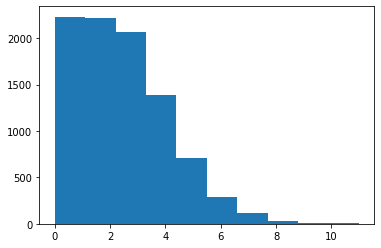

In [60]:
overlaps = [o[0] for o in overlaps_lemma]
print("Overlaps:")
import matplotlib.pyplot as plt
plt.hist(overlaps, bins=10)

In [61]:
import numpy as np
print(np.min(overlaps), np.max(overlaps), np.mean(overlaps))

0 11 2.675967795301643


In [62]:
for i in range(11):
    overlaps_for_i = [n for n in overlaps_lemma if n[0] == i]
    for o in overlaps_for_i:
        id = o[-1]
        results

SyntaxError: invalid syntax (<ipython-input-62-ab8ac1cd98ad>, line 5)

In [64]:
!curl -LO https://zilinec.me/preds-bert.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  575k  100  575k    0     0   971k      0 --:--:-- --:--:-- --:--:--  971k


In [67]:
with open('preds-bert.json') as fp:
    preds = json.load(fp)
preds

{'56be4db0acb8001400a502ec': '',
 '56be4db0acb8001400a502ed': '',
 '56be4db0acb8001400a502ee': 'February 7, 2016,',
 '56be4db0acb8001400a502ef': 'champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10',
 '56be4db0acb8001400a502f0': '',
 '56be8e613aeaaa14008c90d1': 'American football game',
 '56be8e613aeaaa14008c90d2': 'February 7, 2016,',
 '56be8e613aeaaa14008c90d3': '',
 '56bea9923aeaaa14008c91b9': 'American football game',
 '56bea9923aeaaa14008c91ba': '',
 '56bea9923aeaaa14008c91bb': 'February 7, 2016,',
 '56beace93aeaaa14008c91df': 'champion Denver Broncos defeated the National Football Conference (NFC) champion Carolina Panthers 24–10',
 '56beace93aeaaa14008c91e0': "Levi's Stadium",
 '56beace93aeaaa14008c91e1': '',
 '56beace93aeaaa14008c91e2': '"Super Bowl L"),',
 '56beace93aeaaa14008c91e3': '2015',
 '56bf10f43aeaaa14008c94fd': '',
 '56bf10f43aeaaa14008c94fe': '',
 '56bf10f43aeaaa14008c94ff': "Levi's Stadium",
 '56bf10f43aeaaa14008c